In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
filepath_train = './../data/train.csv'
df_train = pd.read_csv(filepath_train)
filepath_test = './../data/test.csv'
df_test = pd.read_csv(filepath_test)
df_train = df_train.rename(columns={'model year':'model_year','car name':'car_name'})
df_test = df_test.rename(columns={'model_year':'model_year','car name':'car_name'})

In [3]:
df_train

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [4]:
# 参照の参照は好まれないらしい
df_train_nn = copy.copy(df_train.query('horsepower != "?"'))
df_train_nn['horsepower'] = df_train_nn['horsepower'].astype(float)
df_train_nn = df_train_nn.drop('id',axis=1)
df_train_nn.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [11]:
# 各変数の統計量
df_train_nn.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,24.172821,5.323077,184.846154,101.297436,2895.630769,15.596410,76.117949,1.584615
std,7.750685,1.650751,98.749328,35.562255,821.394318,2.693432,3.774772,0.803837
min,9.000000,3.000000,71.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2220.000000,13.950000,73.000000,1.000000
50%,24.000000,4.000000,140.000000,92.000000,2711.000000,15.500000,76.000000,1.000000
75%,30.250000,6.000000,250.000000,114.000000,3439.000000,17.000000,79.500000,2.000000
max,44.600000,8.000000,454.000000,220.000000,5140.000000,23.700000,82.000000,3.000000


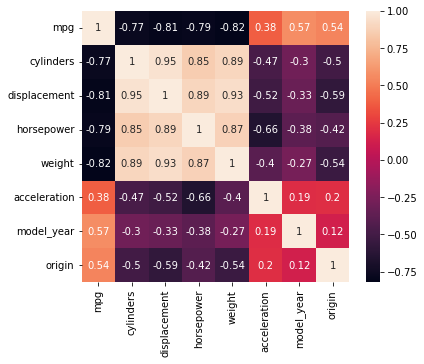

In [12]:
# 相関のヒートマップ
plt.figure(figsize=(6,5))
sns.heatmap(df_train_nn.corr(),annot=True)
plt.show()

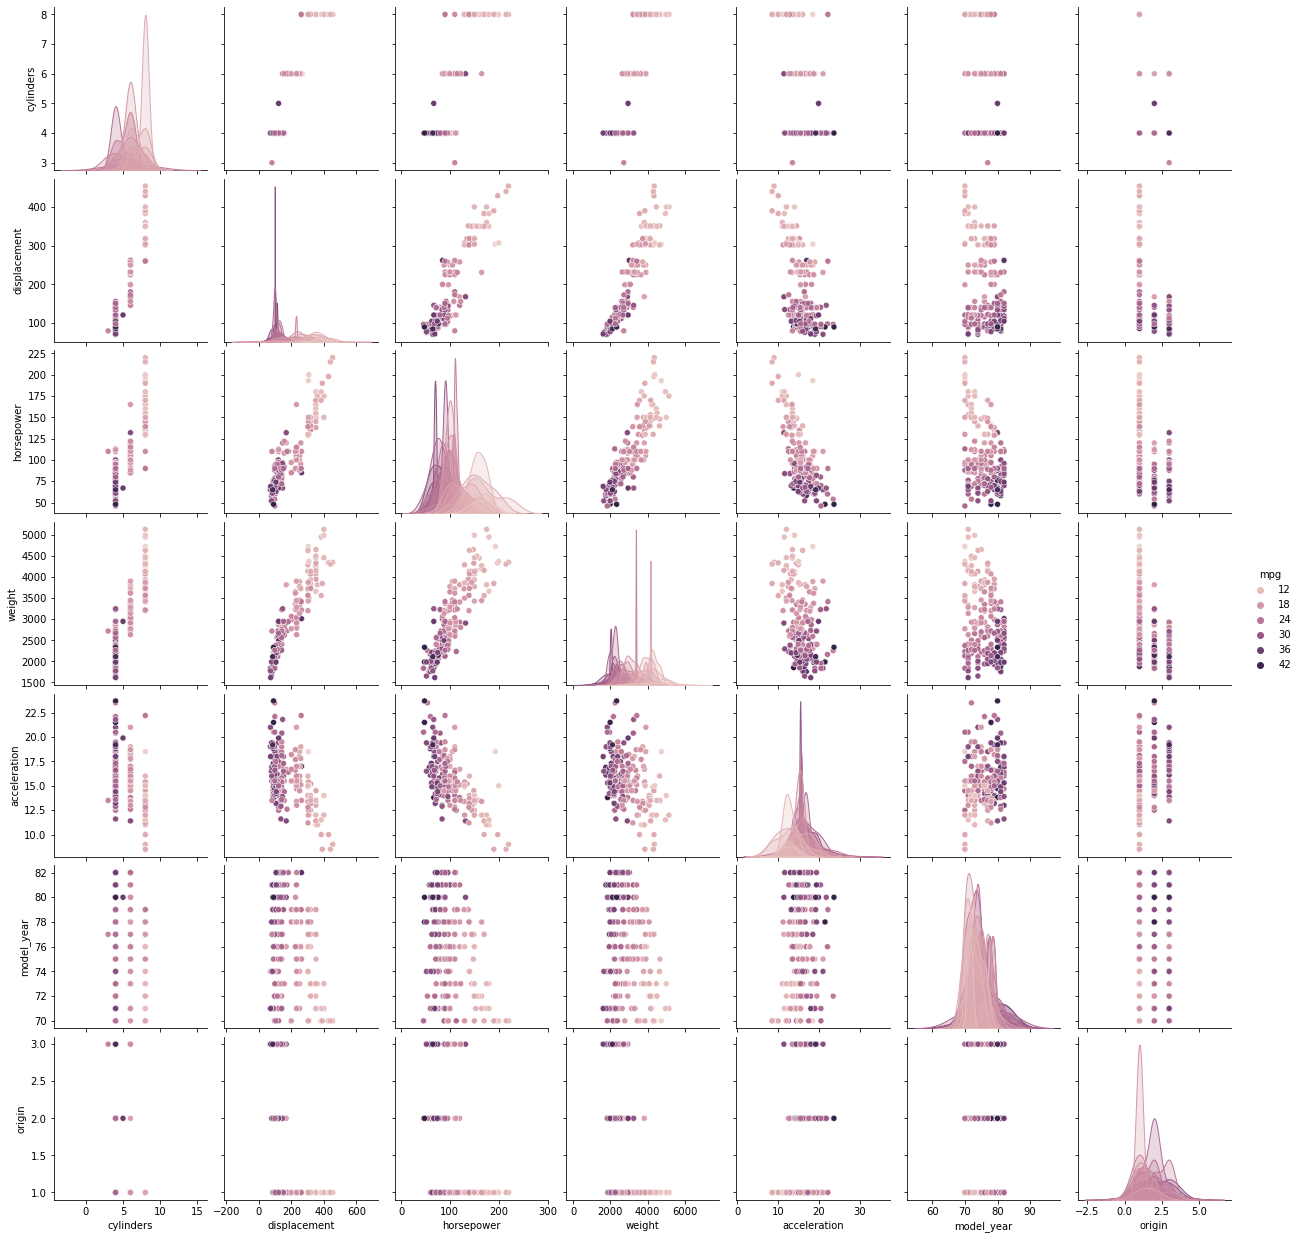

In [13]:
# 散布図一覧
sns.pairplot(data=df_train_nn, hue='mpg')
plt.show()

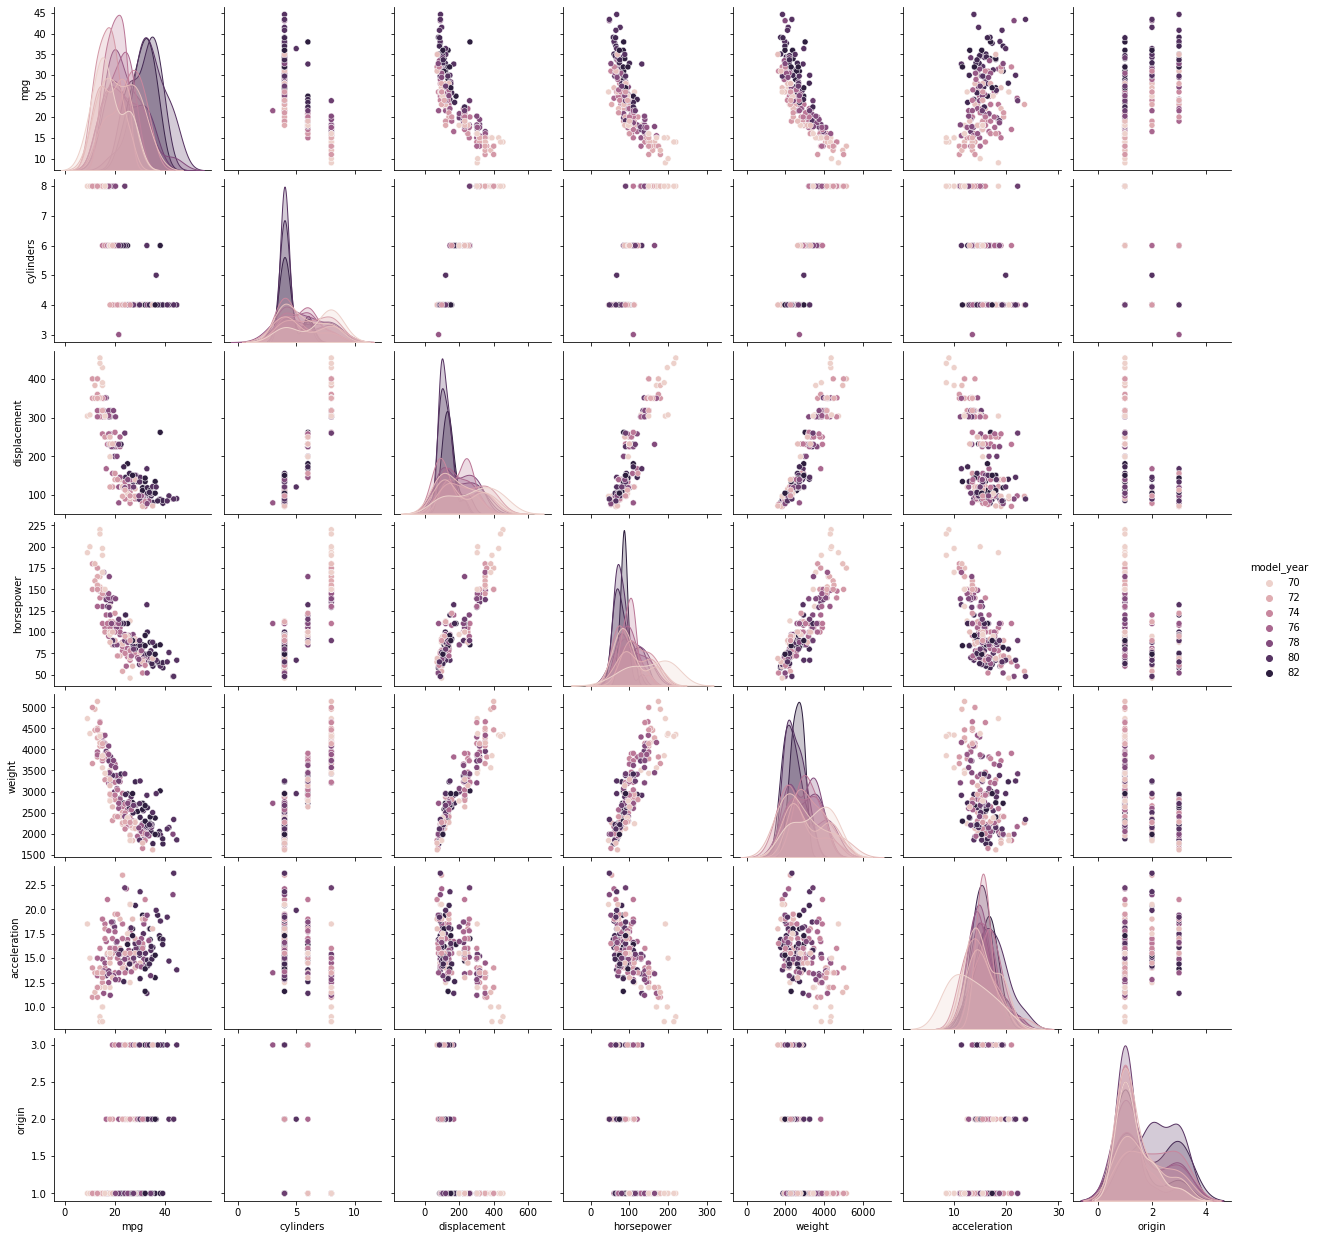

In [15]:
# 散布図一覧
sns.pairplot(data=df_train_nn, hue='model_year')
plt.show()

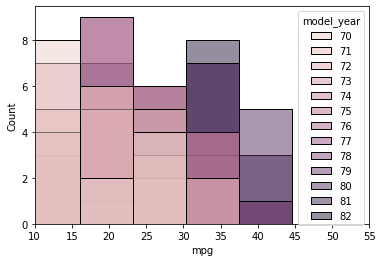

In [16]:
# 時代の変遷と燃費の推移
sns.histplot(data=df_train_nn,x='mpg', bins=5, hue='model_year')
plt.xlim(10,55)
plt.show()

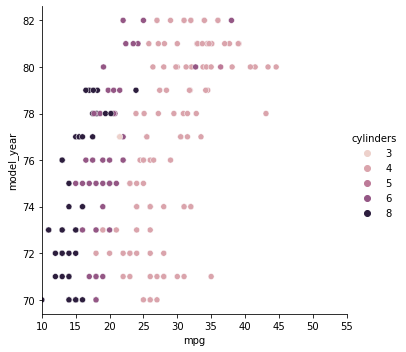

In [17]:
# 時代の変遷と燃費の推移
sns.relplot(data=df_train_nn,x='mpg',y='model_year', hue='cylinders')
plt.xlim(10,55)
plt.show()

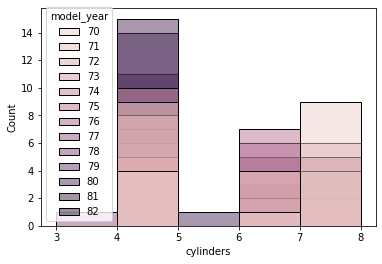

In [18]:
# 時代の変遷とシリンダー
sns.histplot(data=df_train_nn,x='cylinders', bins=5, hue='model_year')
plt.show()

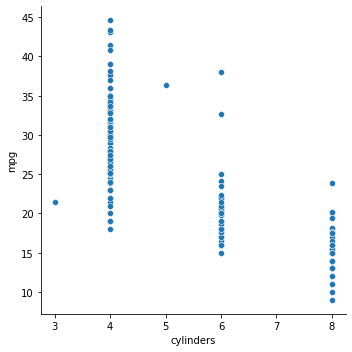

In [19]:
# シリンダーと燃費
sns.relplot(data=df_train_nn,x='cylinders',y='mpg')
plt.show()

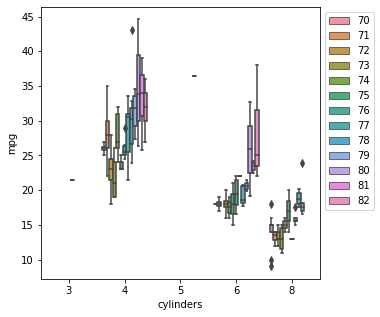

In [20]:
# 時代の変遷とシリンダー、燃費の推移
plt.figure(figsize=(5,5))
sns.boxplot(data=df_train_nn,x='cylinders',y='mpg', hue='model_year')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

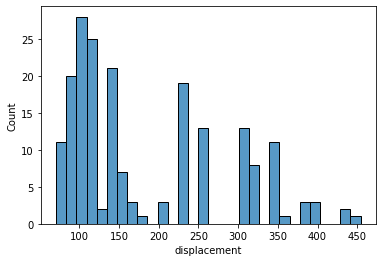

In [21]:
# displacement
sns.histplot(data=df_train_nn,x='displacement', bins=30)
plt.show()

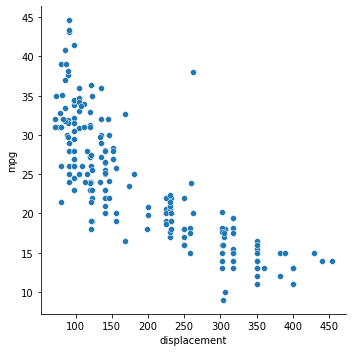

In [22]:
# displacementとmpg
sns.relplot(data=df_train_nn,x='displacement',y='mpg')
plt.show()

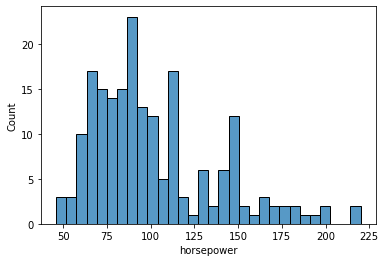

In [23]:
# horsepower
sns.histplot(data=df_train_nn,x='horsepower', bins=30)
plt.show()

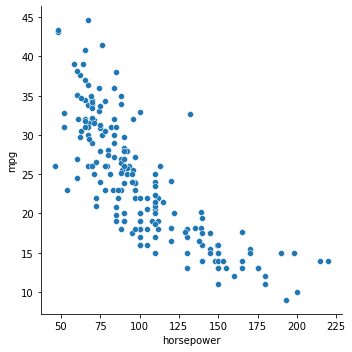

In [24]:
# horsepowerとmpg
sns.relplot(data=df_train_nn,x='horsepower',y='mpg')
plt.show()

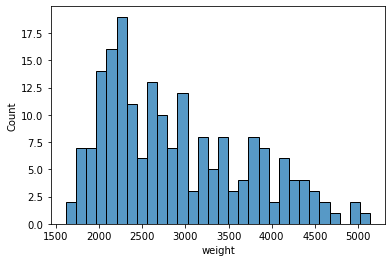

In [25]:
# weight
sns.histplot(data=df_train_nn,x='weight', bins=30)
plt.show()

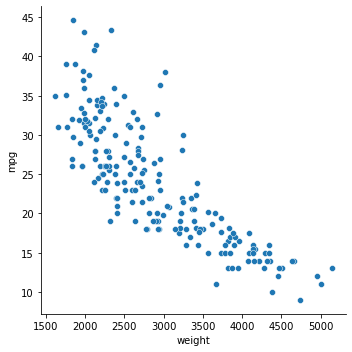

In [26]:
# weightとmpg
sns.relplot(data=df_train_nn,x='weight',y='mpg')
plt.show()

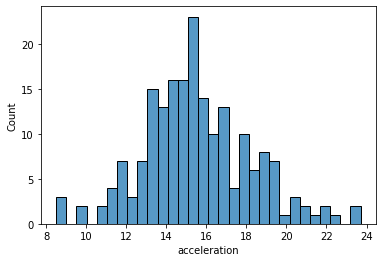

In [27]:
# acceleration
sns.histplot(data=df_train_nn,x='acceleration', bins=30)
plt.show()

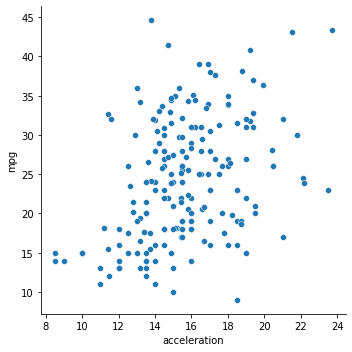

In [28]:
# accelerationとmpg
sns.relplot(data=df_train_nn,x='acceleration',y='mpg')
plt.show()

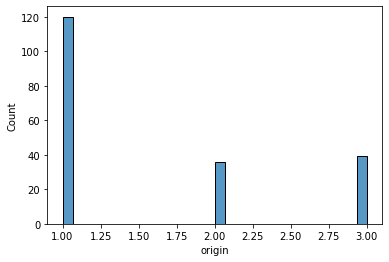

In [29]:
# origin
sns.histplot(data=df_train_nn,x='origin', bins=30)
plt.show()

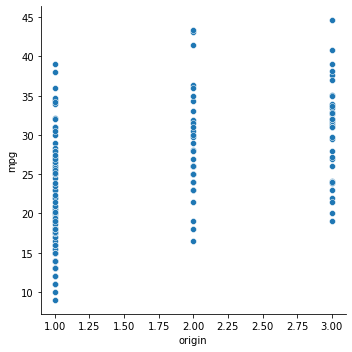

In [30]:
# originとmpg
sns.relplot(data=df_train_nn,x='origin',y='mpg')
plt.show()

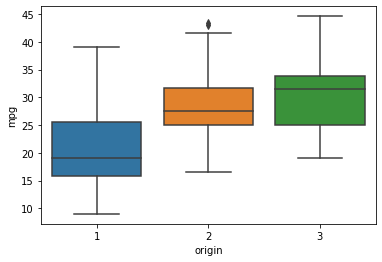

In [31]:
sns.boxplot(data=df_train_nn,x='origin',y='mpg')
plt.show()

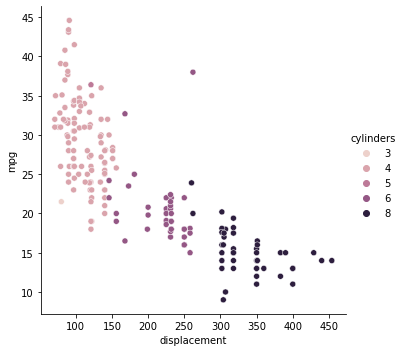

In [32]:
# displacement mpg cylinders
sns.relplot(data=df_train_nn,x='displacement',y='mpg', hue='cylinders')
plt.show()

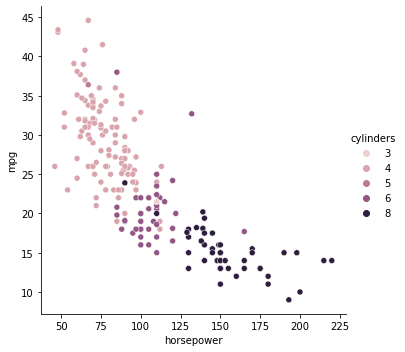

In [33]:
# horsepower mpg cylinders
sns.relplot(data=df_train_nn,x='horsepower',y='mpg', hue='cylinders')
plt.show()

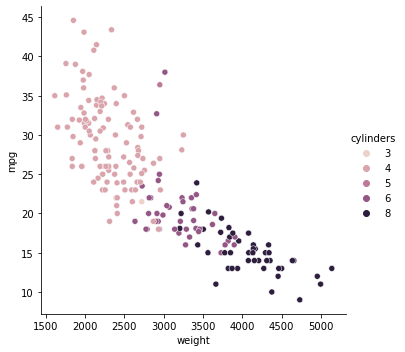

In [34]:
# weight mpg cylinders
sns.relplot(data=df_train_nn,x='weight',y='mpg', hue='cylinders')
plt.show()

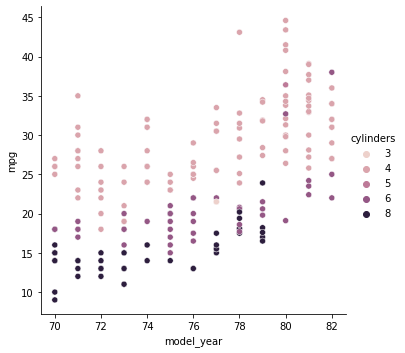

In [37]:
# model_year mpg cylinders
sns.relplot(data=df_train_nn,x='model_year',y='mpg',hue='cylinders')
plt.show()

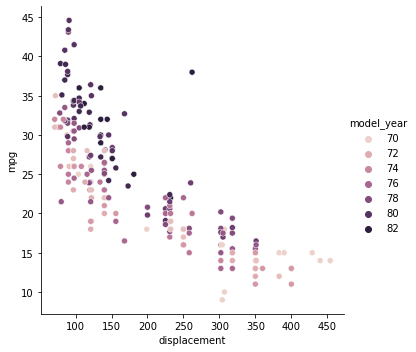

In [38]:
# displacement mpg model_year
sns.relplot(data=df_train_nn,x='displacement',y='mpg', hue='model_year')
plt.show()

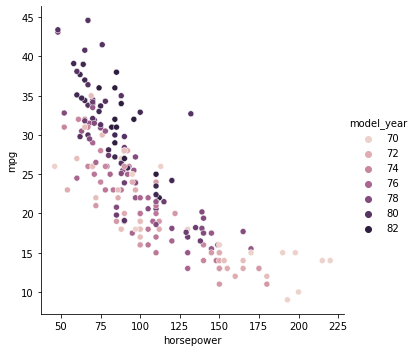

In [39]:
# horsepower mpg model_year
sns.relplot(data=df_train_nn,x='horsepower',y='mpg', hue='model_year')
plt.show()

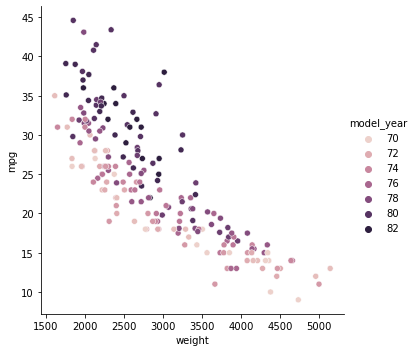

In [41]:
# weight mpg model_year
sns.relplot(data=df_train_nn,x='weight',y='mpg', hue='model_year')
plt.show()

In [44]:
df_train['car_name'].values.reshape(-1,1)

array([['dodge aries se'],
       ['vw rabbit custom'],
       ['toyota mark ii'],
       ['dodge colt'],
       ['toyota tercel'],
       ['pontiac phoenix'],
       ['chevroelt chevelle malibu'],
       ['oldsmobile omega'],
       ['bmw 2002'],
       ['dodge st. regis'],
       ['mercedes-benz 280s'],
       ['dodge omni'],
       ['datsun pl510'],
       ['chevrolet impala'],
       ['amc hornet'],
       ['renault 12 (sw)'],
       ['chevrolet chevette'],
       ['chevrolet woody'],
       ['peugeot 505s turbo diesel'],
       ['datsun 280-zx'],
       ['ford pinto'],
       ['mercury cougar brougham'],
       ['subaru'],
       ['chevrolet caprice classic'],
       ['amc concord dl'],
       ['mercury zephyr 6'],
       ['pontiac safari (sw)'],
       ['dodge charger 2.2'],
       ['chevrolet chevelle malibu'],
       ['oldsmobile cutlass ciera (diesel)'],
       ['honda accord cvcc'],
       ['chevrolet chevelle malibu classic'],
       ['volkswagen scirocco'],
       ['toyota 

In [45]:
# toyotaとorigin
df_train[df_train['car_name'].str.contains('toyota')][['origin','car_name']]

,origin,car_name
2,3,toyota mark ii
4,3,toyota tercel
33,3,toyota starlet
35,3,toyota corolla 1200
59,3,toyota corolla
62,3,toyota corolla tercel
105,3,toyota corona
136,3,toyota mark ii
142,3,toyota corona
155,3,toyota corolla 1200


In [46]:
# hondaとorigin
df_train[df_train['car_name'].str.contains('honda')][['origin','car_name']]

,origin,car_name
30,3,honda accord cvcc
48,3,honda civic 1300
49,3,honda civic 1500 gl
96,3,honda civic
169,3,honda accord lx
173,3,honda prelude


In [47]:
# 単語を空白で切り分けて、最初の単語を取り出してmaker変数とする
df_train_mk = copy.copy(df_train)
for id, name in enumerate(df_train_mk.loc[:,'car_name'].str.split()):
    df_train_mk.loc[id,'maker'] = name[0]

In [48]:
# 各メーカーがどのくらいあるのか確認
df_train_mk.sort_values('maker').groupby('origin')['maker'].value_counts(sort=False)

origin  maker        
1       amc              16
        buick             8
        capri             1
        chevroelt         1
        chevrolet        27
        chevy             2
        dodge            18
        ford             20
        hi                1
        mercury           6
        oldsmobile        4
        plymouth         13
        pontiac           5
2       audi              2
        bmw               2
        fiat              4
        mercedes-benz     2
        opel              3
        peugeot           2
        renault           3
        saab              2
        triumph           1
        vokswagen         1
        volkswagen       10
        volvo             2
        vw                4
3       datsun           14
        honda             6
        mazda             3
        subaru            2
        toyota           13
        toyouta           1
Name: maker, dtype: int64

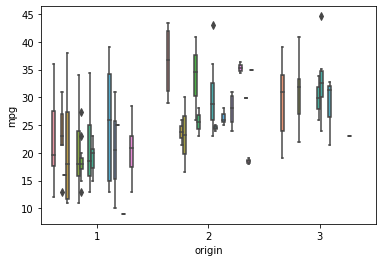

In [49]:
# メーカーごとに燃費に差があるのか？
sns.boxplot(data=df_train_mk, x='origin', y='mpg', hue='maker')
plt.legend().remove()
plt.show()

### 教師無し学習
* kmeans
* デンドログラム
* DBSCAN
* 最近傍法
* DSN 多次元尺度構成法
* UMAP
* 

In [18]:
df_train

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,mercury monarch ghia
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
197,395,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


## kmeans

### 前処理

In [5]:
# horsepowerの?を埋める
mean_group_cy_ye = df_train_nn.groupby(['cylinders','model_year']).mean()
df_train_cy_ye = copy.copy(df_train)
df_train_cy_ye.loc[df_train_cy_ye['horsepower']=='?','horsepower'] = df_train[df_train['horsepower']=='?'].apply(lambda x: mean_group_cy_ye.loc[x.cylinders,x.model_year]['horsepower'], axis=1)
df_train_cy_ye.horsepower = df_train_cy_ye.horsepower.astype(float)

In [6]:
# 変換されたか確認
df_train_cy_ye[df_train['horsepower']=='?'][['cylinders','model_year','horsepower']]

,cylinders,model_year,horsepower
24,4,82,84.272727
113,4,81,73.285714
145,4,80,72.733333
175,4,71,75.333333


In [7]:
# dfは出力したいDataFrame
# wは横幅、hは縦幅
# outputPathは出力先のパス

def TablePlot(df,w,h,outputPath):
    fig, ax = plt.subplots(figsize=(w,h))
    ax.axis('off')
    ax.table(
        df.values,
        colLabels = df.columns,
        loc = 'center',
        bbox=[0,0,1,1]
    )
    plt.savefig(outputPath)
    plt.show()

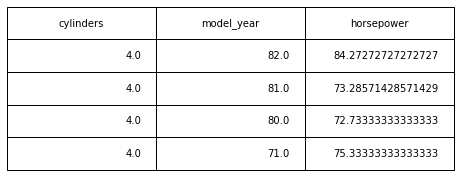

In [83]:
# 変換したデータの出力
TablePlot(df_train_cy_ye[df_train['horsepower']=='?'][['cylinders','model_year','horsepower']],8,3,'./../img/horsepower_cy_ye.png')

In [24]:
# 不要な列の削除
quantity_features = ['mpg', 'displacement', 'horsepower', 'weight','acceleration']
df_train_km = df_train_cy_ye[quantity_features]

In [25]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
km_train_ss = ss.fit_transform(df_train_km)

In [26]:
# kmeans法で分ける
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, random_state=0)
KM.fit(km_train_ss)
cluster = KM.predict(km_train_ss)

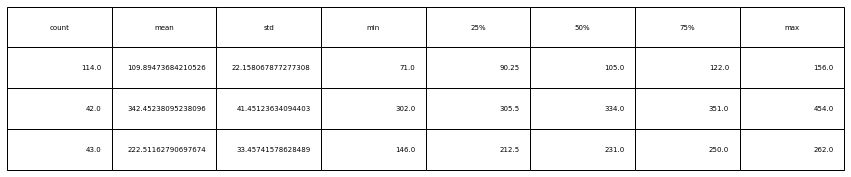

In [158]:
df_train_km3 = copy.copy(df_train_cy_ye)
df_train_km3['cluster'] = cluster
km3 = df_train_km3.groupby('cluster').describe()['displacement']
TablePlot(km3, 15, 3, './../img/km3_describe.png')

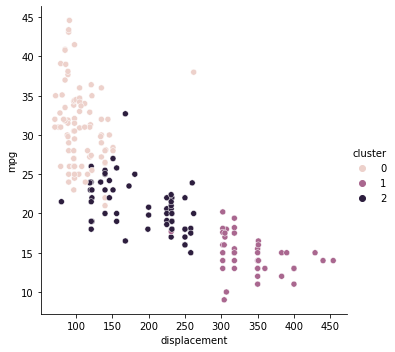

In [29]:
# displacementとcluster
sns.relplot(data=df_train_km3, x='displacement', y='mpg', hue='cluster')
plt.show()

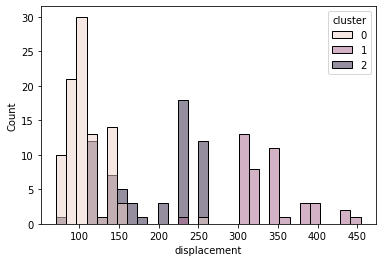

In [30]:
# displacementとcluster ヒストグラム
sns.histplot(data=df_train_km3, x='displacement', hue='cluster', bins=30)
plt.show()

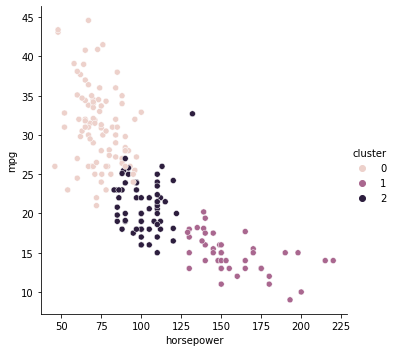

In [31]:
# horsepowerとcluster
sns.relplot(data=df_train_km3, x='horsepower', y='mpg', hue='cluster')
plt.show()

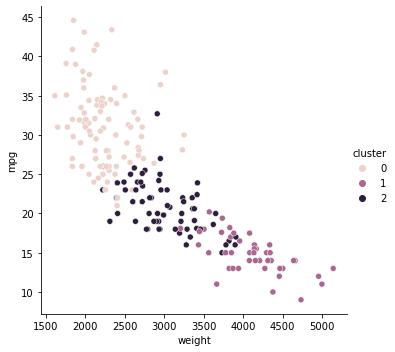

In [32]:
# weightとcluster
sns.relplot(data=df_train_km3, x='weight', y='mpg', hue='cluster')
plt.show()

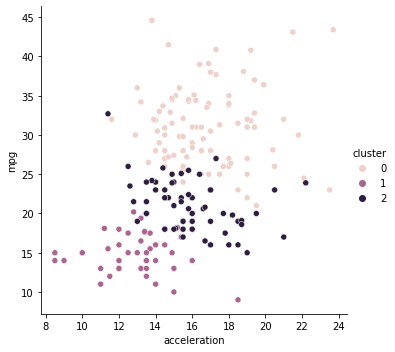

In [33]:
# accelerationとcluster
sns.relplot(data=df_train_km3, x='acceleration', y='mpg', hue='cluster')
plt.show()

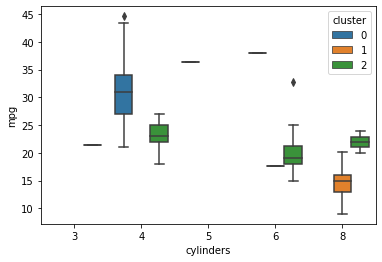

In [34]:
# cylindersとcluster
sns.boxplot(data=df_train_km3, x='cylinders', y='mpg', hue='cluster')
plt.show()

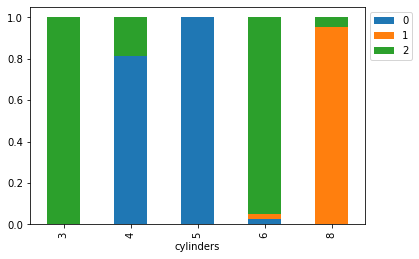

In [35]:
# 積み上げ棒グラフ
crosstable = pd.crosstab(df_train_km3.cylinders, df_train_km3.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

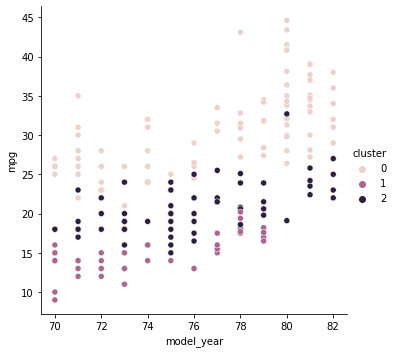

In [36]:
# model_yearとcluster
sns.relplot(data=df_train_km3, x='model_year', y='mpg', hue='cluster')
plt.show()

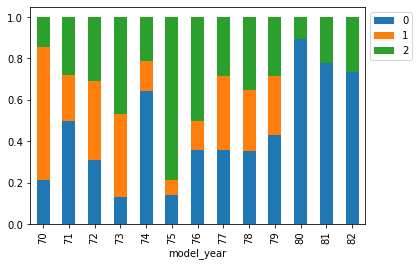

In [37]:
# 積み上げ棒グラフ
crosstable = pd.crosstab(df_train_km3.model_year, df_train_km3.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

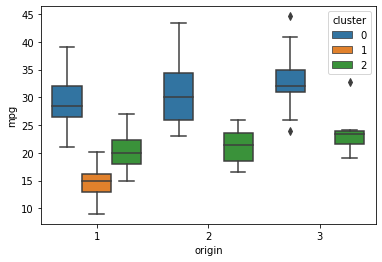

In [38]:
# originとcluster
sns.boxplot(data=df_train_km3, x='origin', y='mpg', hue='cluster')
plt.show()

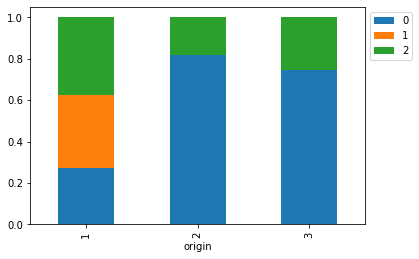

In [39]:
# 積み上げ棒グラフ
crosstable = pd.crosstab(df_train_km3.origin, df_train_km3.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [40]:
# kmeans法で分ける
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=5, random_state=0)
KM.fit(km_train_ss)
cluster = KM.predict(km_train_ss)

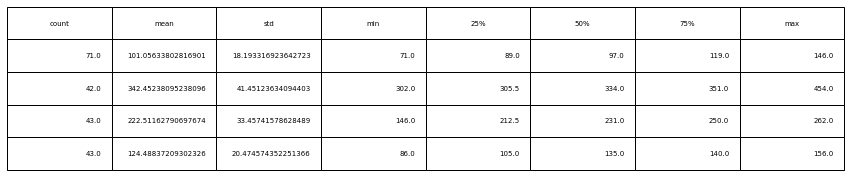

In [161]:
df_train_km3 = copy.copy(df_train_cy_ye)
df_train_km3['cluster'] = cluster
km5 = df_train_km3.groupby('cluster').describe()['displacement']
TablePlot(km5, 15, 3, './../img/km5_describe.png')

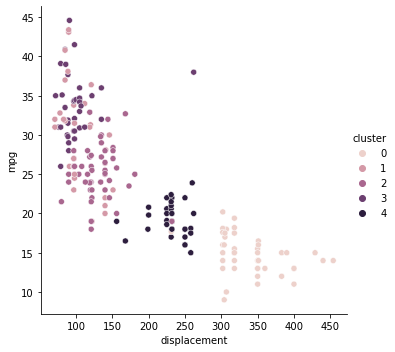

In [42]:
# displacementとcluster
sns.relplot(data=df_train_km3, x='displacement', y='mpg', hue='cluster')
plt.show()

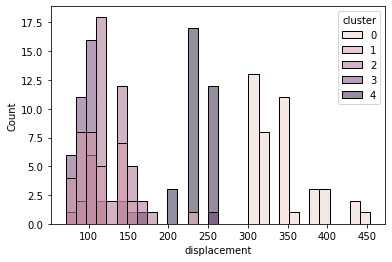

In [43]:
# displacementとcluster ヒストグラム
sns.histplot(data=df_train_km3, x='displacement', hue='cluster', bins=30)
plt.show()

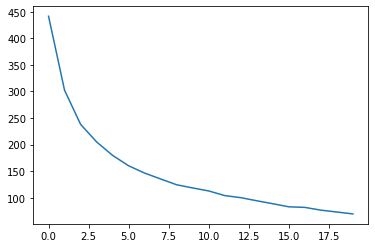

In [44]:
# エルボー図の作成
inertia = []
for i in range(2,22):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(km_train_ss)
    inertia.append(KM.inertia_)
    
plt.plot(inertia)
plt.show()

### Gower距離を使ったクラスタリング

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
# 量的変数を標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df_train_ss = copy.copy(df_train_cy_ye)
quantity_features = ['mpg', 'displacement', 'horsepower', 'weight','acceleration']
df_train_ss[quantity_features] = ss.fit_transform(df_train_ss[quantity_features])
df_train_ss

# 質的変数をobject型に変換
quality_features = ['cylinders', 'model_year', 'origin', 'car_name']
df_train_ss[quality_features] = df_train_ss[quality_features].astype('object')
df_train_ss.dtypes

id                int64
mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year       object
origin           object
car_name         object
dtype: object

In [11]:
# Gower距離行列に変換
import gower

df_train_gw = copy.copy(df_train_ss)
df_train_gw .drop(['id','car_name'],axis=1)
df_train_gw = gower.gower_matrix(df_train_gw)

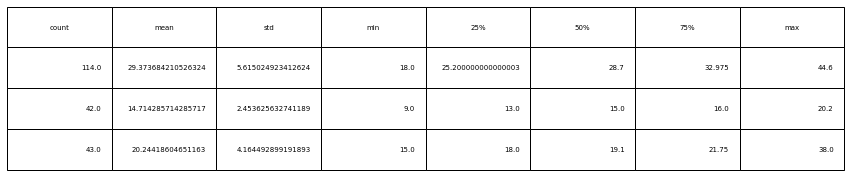

In [159]:
# Gower距離行列でkmeans
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(df_train_gw)
cluster = KM.predict(df_train_gw)
df_train_cy_ye['cluster'] = cluster
gw_km3 = df_train_cy_ye.groupby('cluster').describe()['mpg']
TablePlot(gw_km3, 15, 3, './../img/gower_km3_describe.png')

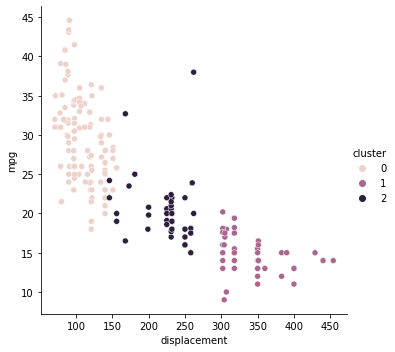

In [124]:
# displacementとcluster
sns.relplot(data=df_train_cy_ye, x='displacement', y='mpg', hue='cluster')
plt.show()

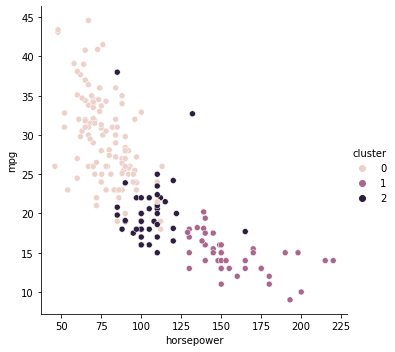

In [100]:
# horsepowerとcluster
sns.relplot(data=df_train_cy_ye, x='horsepower', y='mpg', hue='cluster')
plt.show()

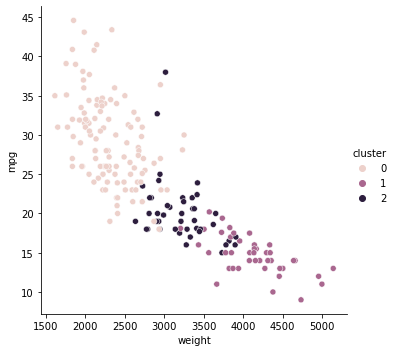

In [101]:
# weightとcluster
sns.relplot(data=df_train_cy_ye, x='weight', y='mpg', hue='cluster')
plt.show()

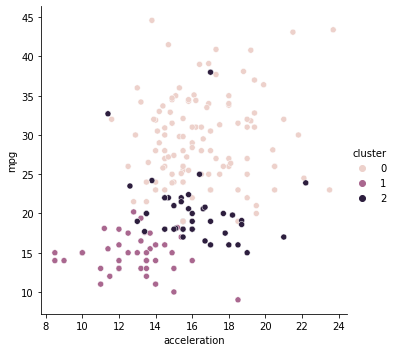

In [102]:
# accelerationとcluster
sns.relplot(data=df_train_cy_ye, x='acceleration', y='mpg', hue='cluster')
plt.show()

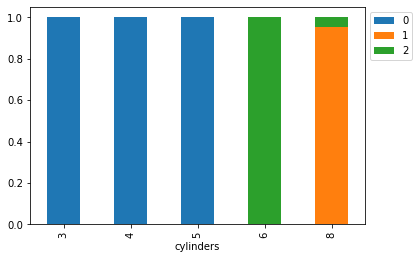

In [125]:
# cylindersとcluster
# やはりcylindersでおおよその性質が説明できてしまうということか
crosstable = pd.crosstab(df_train_cy_ye.cylinders, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./../img/gower_cylinders_cluster.png')
plt.show()

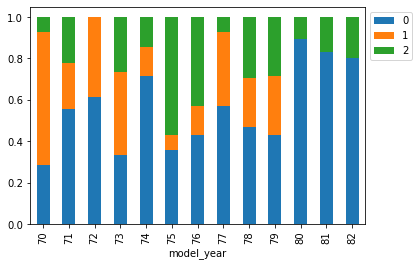

In [127]:
# model_yearとcluster
crosstable = pd.crosstab(df_train_cy_ye.model_year, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

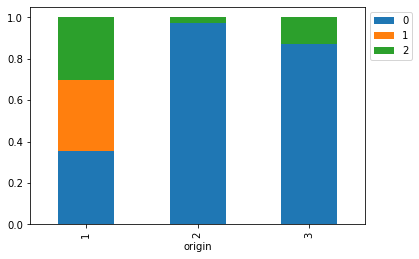

In [110]:
# originとcluster
crosstable = pd.crosstab(df_train_cy_ye.origin, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

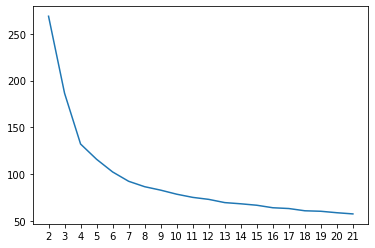

In [128]:
# 4つが最適？
inertia = []
for i in range(2,22):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(df_train_gw)
    inertia.append(KM.inertia_)

plt.plot(np.arange(2,22),inertia)
plt.xticks(np.arange(2,22))
plt.savefig('./../img/gower_kmeans_elbow.png')
plt.show()

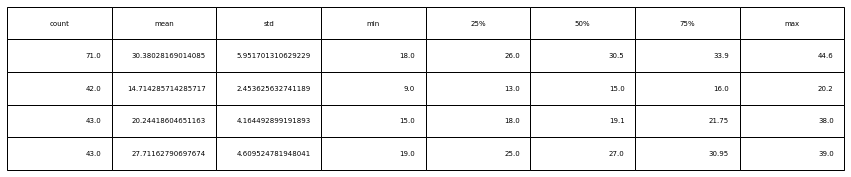

In [160]:
# Gower距離行列でkmeans
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=4,random_state=0)
KM.fit(df_train_gw)
cluster = KM.predict(df_train_gw)
df_train_cy_ye['cluster'] = cluster
gw_km4 = df_train_cy_ye.groupby('cluster').describe()['mpg']
TablePlot(gw_km4, 15, 3, './../img/gower_km4_describe.png')

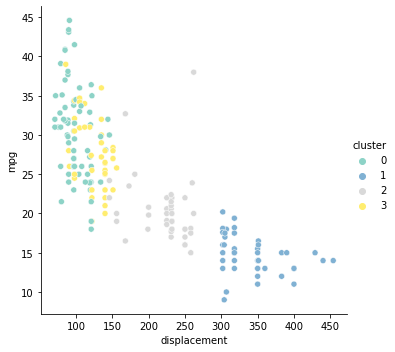

In [145]:
# displacementとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='displacement', y='mpg', hue='cluster', palette=cmap)
plt.savefig('./../img/gower4_displacement_mpg_cluster.png')
plt.show()

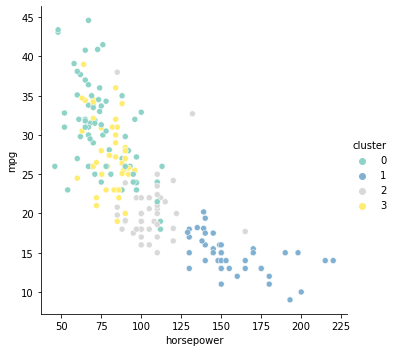

In [162]:
# horsepowerとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='horsepower', y='mpg', hue='cluster', palette=cmap)
plt.show()

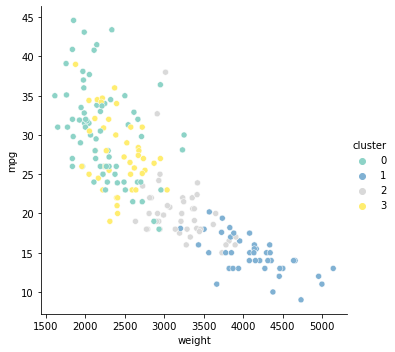

In [163]:
# weightとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='weight', y='mpg', hue='cluster', palette=cmap)
plt.savefig('./../img/gower4_weight_mpg_cluster.png')
plt.show()

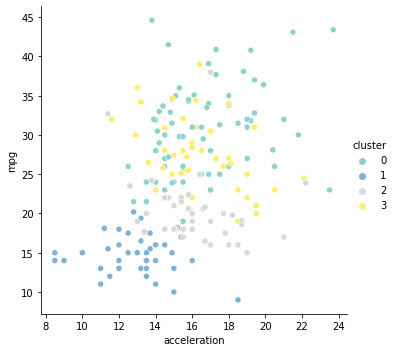

In [164]:
# accelerationとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='acceleration', y='mpg', hue='cluster', palette=cmap)
plt.savefig('./../img/gower4_acceleration_mpg_cluster.png')
plt.show()

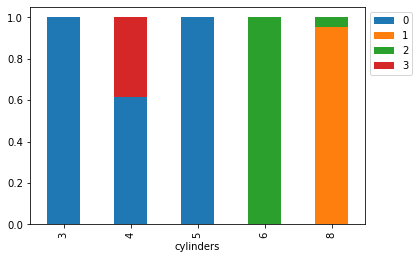

In [165]:
# cylindersとcluster
# やはりcylindersでおおよその性質が説明できてしまうということか
crosstable = pd.crosstab(df_train_cy_ye.cylinders, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./../img/gower4_cylinders_cluster.png')
plt.show()

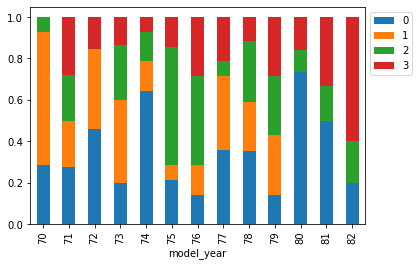

In [166]:
# model_yearとcluster
crosstable = pd.crosstab(df_train_cy_ye.model_year, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

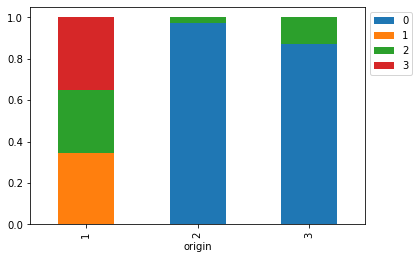

In [167]:
# originとcluster
crosstable = pd.crosstab(df_train_cy_ye.origin, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./../img/gower4_origin_cluster.png')
plt.show()

In [182]:
# Gower距離行列でkmeans
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=5,random_state=0)
KM.fit(df_train_gw)
cluster = KM.predict(df_train_gw)
df_train_cy_ye['cluster'] = cluster
df_train_cy_ye.groupby('cluster').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,37.0,29.416216,6.329671,18.0,25.0,28.1,33.00,43.4
1,42.0,14.714286,2.453626,9.0,13.0,15.0,16.00,20.2
2,43.0,27.711628,4.609525,19.0,25.0,27.0,30.95,39.0
3,43.0,20.244186,4.164493,15.0,18.0,19.1,21.75,38.0
4,34.0,31.429412,5.408889,21.5,27.4,31.9,33.95,44.6


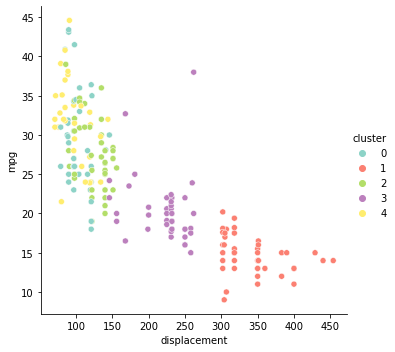

In [183]:
# displacementとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='displacement', y='mpg', hue='cluster', palette=cmap)
plt.show()

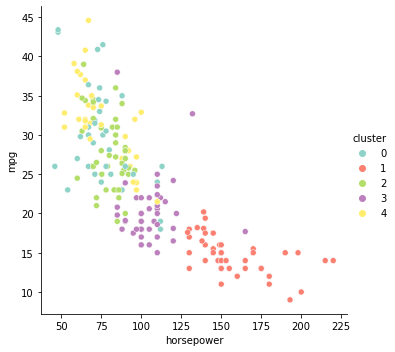

In [184]:
# horsepowerとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='horsepower', y='mpg', hue='cluster', palette=cmap)
plt.show()

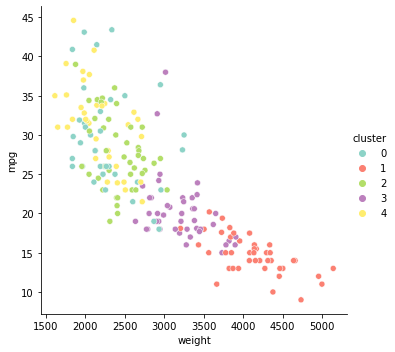

In [185]:
# weightとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='weight', y='mpg', hue='cluster', palette=cmap)
plt.show()

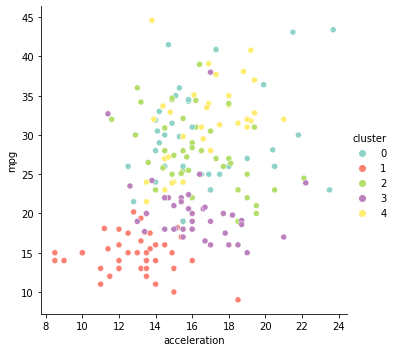

In [186]:
# accelerationとcluster
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x='acceleration', y='mpg', hue='cluster', palette=cmap)
plt.show()

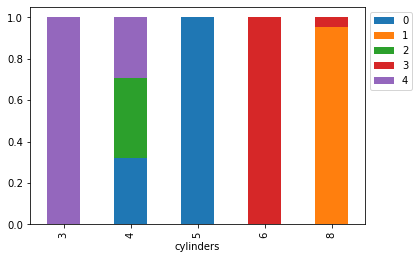

In [187]:
# cylindersとcluster
# やはりcylindersでおおよその性質が説明できてしまうということか
crosstable = pd.crosstab(df_train_cy_ye.cylinders, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

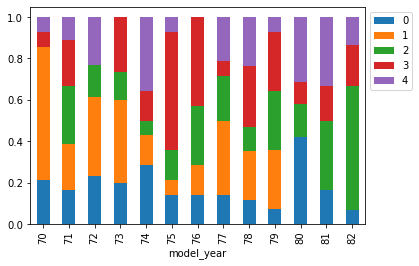

In [188]:
# model_yearとcluster
crosstable = pd.crosstab(df_train_cy_ye.model_year, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

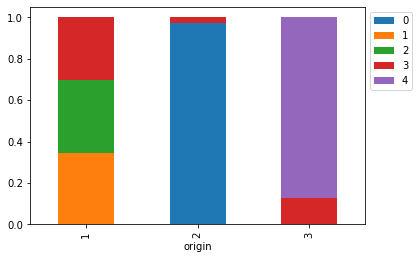

In [189]:
# originとcluster
crosstable = pd.crosstab(df_train_cy_ye.origin, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('./../img/gower_km5_origin_cluster.png')
plt.show()

In [177]:
# Gower距離行列でkmeans
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=6,random_state=0)
KM.fit(df_train_gw)
cluster = KM.predict(df_train_gw)
df_train_cy_ye['cluster'] = cluster
df_train_cy_ye.groupby('cluster').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,33.0,31.730303,5.195761,23.0,28.0,32.0,34.00,44.6
1,42.0,14.714286,2.453626,9.0,13.0,15.0,16.00,20.2
2,43.0,27.711628,4.609525,19.0,25.0,27.0,30.95,39.0
3,37.0,29.416216,6.329671,18.0,25.0,28.1,33.00,43.4
4,37.0,19.894595,3.852773,15.0,18.0,19.0,21.00,38.0
5,7.0,22.271429,5.201190,16.5,19.5,21.5,23.10,32.7


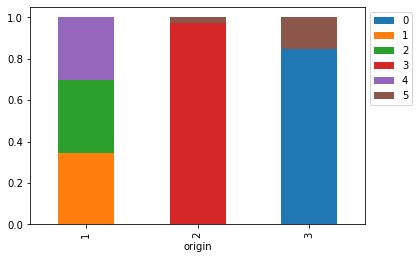

In [178]:
# originとcluster
crosstable = pd.crosstab(df_train_cy_ye.origin, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [179]:
# Gower距離行列でkmeans
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=7,random_state=0)
KM.fit(df_train_gw)
cluster = KM.predict(df_train_gw)
df_train_cy_ye['cluster'] = cluster
df_train_cy_ye.groupby('cluster').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,37.0,29.416216,6.329671,18.0,25.0,28.1,33.00,43.4
1,25.0,16.616000,2.532568,13.0,15.0,16.0,18.00,23.9
2,43.0,27.711628,4.609525,19.0,25.0,27.0,30.95,39.0
3,35.0,19.777143,3.902645,15.0,18.0,19.0,20.90,38.0
4,33.0,31.730303,5.195761,23.0,28.0,32.0,34.00,44.6
5,19.0,12.973684,1.783206,9.0,12.0,13.0,14.00,15.5
6,7.0,22.271429,5.201190,16.5,19.5,21.5,23.10,32.7


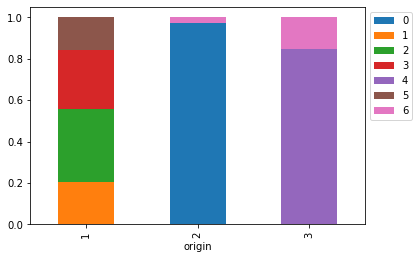

In [180]:
# originとcluster
crosstable = pd.crosstab(df_train_cy_ye.origin, df_train_cy_ye.cluster, normalize='index')
crosstable.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [25]:
# sklearnでも出来るけど面倒だった
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [62]:
from sklearn.cluster import AgglomerativeClustering

Ward = AgglomerativeClustering(
    n_clusters = 3,
    distance_threshold = None,
    linkage = 'ward'
)
Ward.fit_predict(df_train_gw)

C:\Users\doubl\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0,
       2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0], dtype=int64)

In [34]:
plot_dendrogram(Ward,truncate_mode='lastp', p=30)

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

C:\Users\doubl\AppData\Local\Temp\ipykernel_14512\2523523983.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  result = linkage(df_train_gw, method='ward')


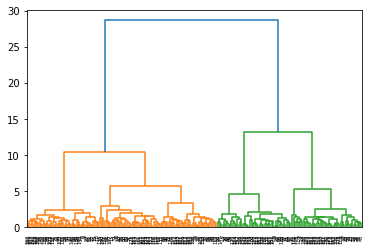

In [67]:
# scipyでデンドログラム

# 凝縮距離行列に変換していないパターン
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# デンドログラムの作成
result = linkage(df_train_gw, method='ward')
dendrogram(result)
plt.show()

In [68]:
len(fcluster(result, t=1, criterion='distance'))

199

In [70]:
# condensed distance matrix の表現方式に変換
from scipy.spatial.distance import squareform
df_train_gw_1d = squareform(df_train_gw)
print(df_train_gw_1d)

[0.35855487 0.46441108 0.24371803 ... 0.70158684 0.57477355 0.33128768]


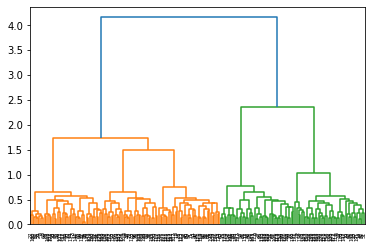

In [71]:
# デンドログラムの作成
result = linkage(df_train_gw_1d, method='ward')
dendrogram(result)
plt.show()

In [100]:
# ward法でクラスター分け
result = linkage(df_train_gw_1d, method='ward')
cluster = fcluster(result, t=2.5, criterion='distance')
df_train_cy_ye['cluster'] = cluster
print(cluster)

[1 1 2 1 1 1 2 2 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1 1 1 1 2
 1 1 1 1 1 2 2 1 1 2 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1
 2 2 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 2 1 2 1 1
 2 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 2 1 2 1 1 1 1 1 2
 2 2 2 2 1 2 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 1 2 2 2 1 2 2 1 1]


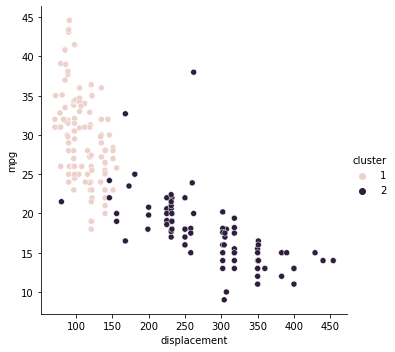

In [80]:
x_name = 'displacement'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram2.png')
plt.show()

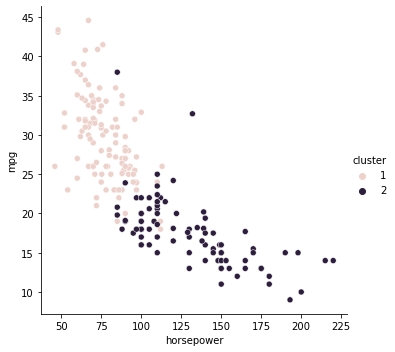

In [81]:
x_name = 'horsepower'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram2.png')
plt.show()

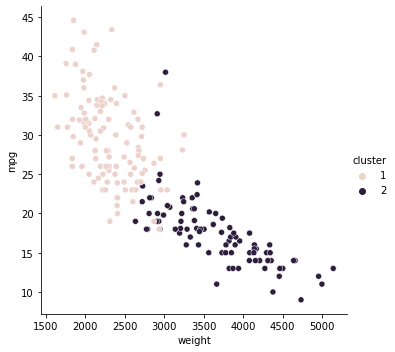

In [82]:
x_name = 'weight'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram2.png')
plt.show()

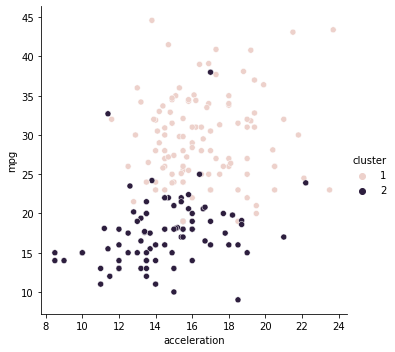

In [83]:
x_name = 'acceleration'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram2.png')
plt.show()

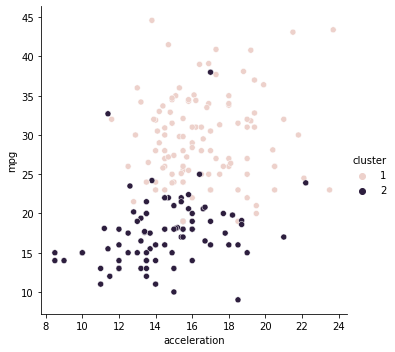

In [83]:
x_name = 'acceleration'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram2.png')
plt.show()

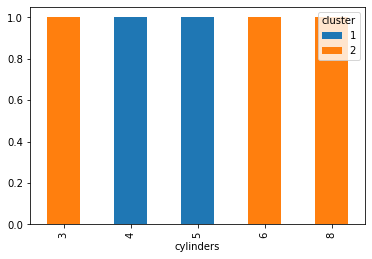

In [90]:
name = 'cylinders'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram2.png')
plt.show()

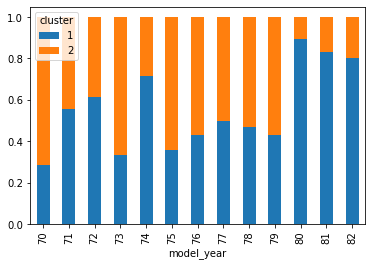

In [94]:
name = 'model_year'
crosstable = pd.crosstab(df_train_cy_ye[name],df_train_cy_ye['cluster'],normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram2.png')
plt.show()

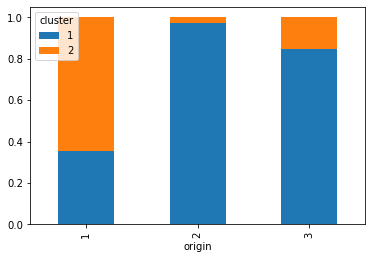

In [95]:
name = 'origin'
crosstable = pd.crosstab(df_train_cy_ye[name],df_train_cy_ye['cluster'],normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram2.png')
plt.show()

In [103]:
# ward法でクラスタを3つに分ける
result = linkage(df_train_gw_1d, method='ward')
cluster = fcluster(result, t=2, criterion='distance')
df_train_cy_ye['cluster'] = cluster

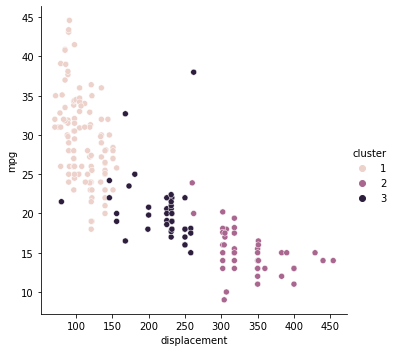

In [105]:
x_name = 'displacement'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram3.png')
plt.show()

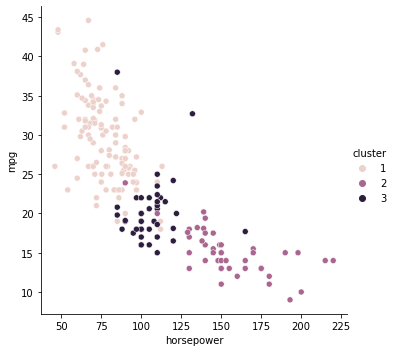

In [106]:
x_name = 'horsepower'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram3.png')
plt.show()

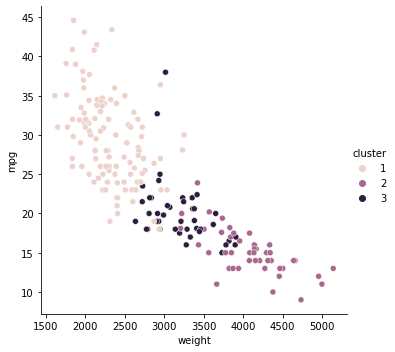

In [107]:
x_name = 'weight'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram3.png')
plt.show()

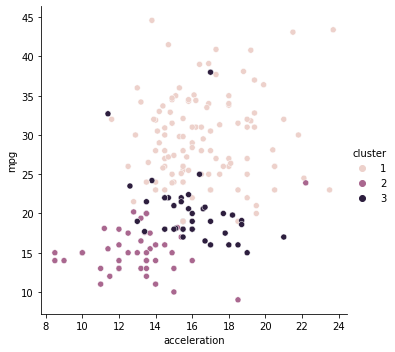

In [108]:
x_name = 'acceleration'
y_name = 'mpg'
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster')
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram3.png')
plt.show()

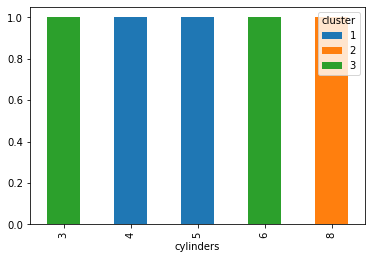

In [111]:
# kmeansよりもはっきりと分かれる
name = 'cylinders'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram3.png')
plt.show()

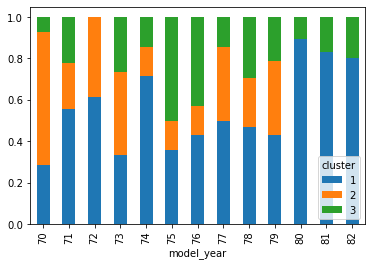

In [112]:
name = 'model_year'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram3.png')
plt.show()

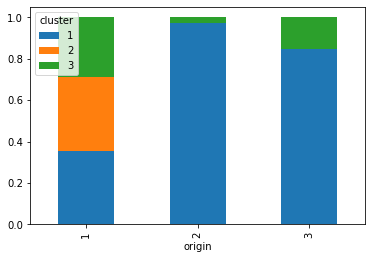

In [113]:
name = 'origin'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram3.png')
plt.show()

In [116]:
# ward法でクラスタを4つに分ける
result = linkage(df_train_gw_1d, method='ward')
cluster = fcluster(result, t=1.6, criterion='distance')
df_train_cy_ye['cluster'] = cluster

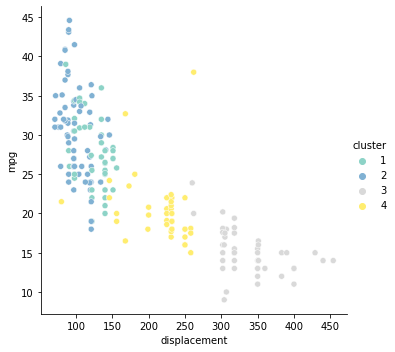

In [121]:
x_name = 'displacement'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

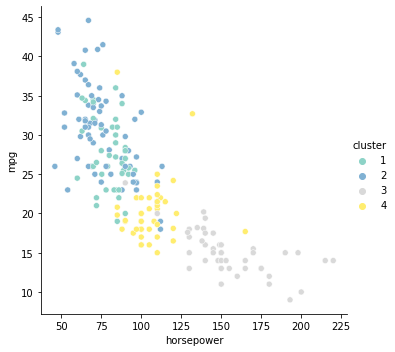

In [122]:
x_name = 'horsepower'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

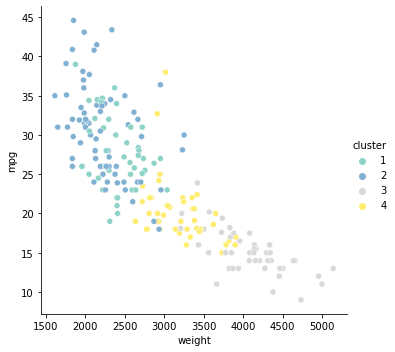

In [123]:
x_name = 'weight'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

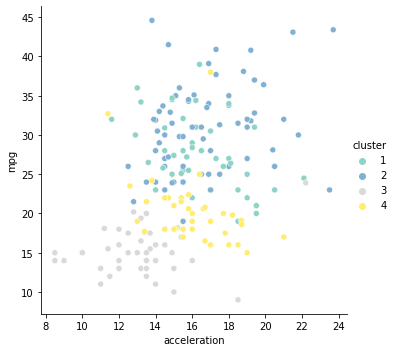

In [126]:
x_name = 'acceleration'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

<AxesSubplot:xlabel='cylinders'>

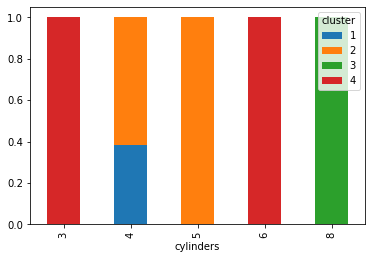

In [127]:
name = 'cylinders'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)

<AxesSubplot:xlabel='origin'>

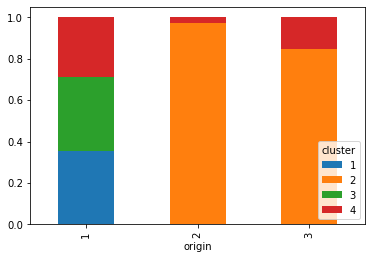

In [128]:
name = 'origin'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)

<AxesSubplot:xlabel='model_year'>

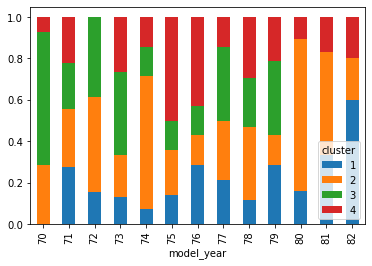

In [129]:
name = 'model_year'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)

In [131]:
# ward法でクラスタを5つに分ける
result = linkage(df_train_gw_1d, method='ward')
cluster = fcluster(result, t=1.5, criterion='distance')
df_train_cy_ye['cluster'] = cluster

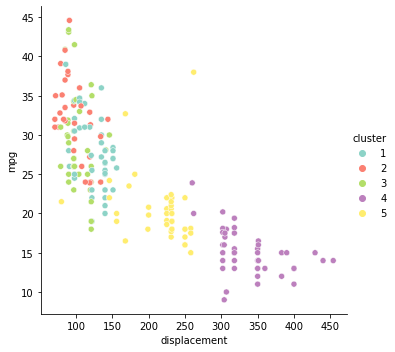

In [132]:
x_name = 'displacement'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

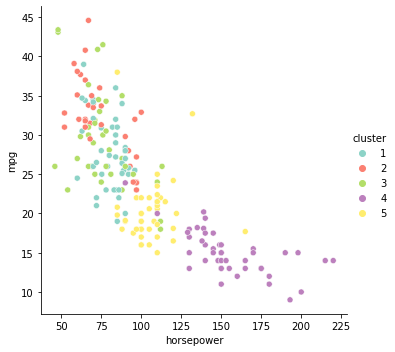

In [133]:
x_name = 'horsepower'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

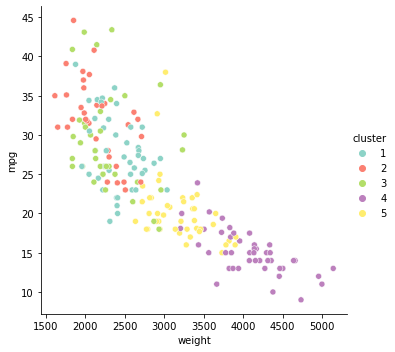

In [134]:
x_name = 'weight'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

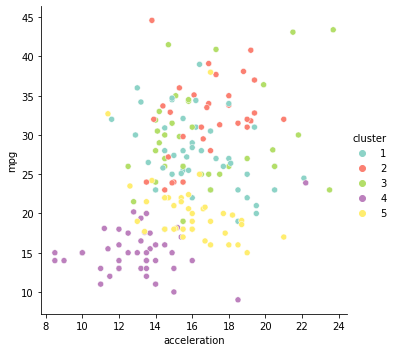

In [135]:
x_name = 'acceleration'
y_name = 'mpg'
cmap = plt.get_cmap('Set3')
sns.relplot(data=df_train_cy_ye, x=x_name, y=y_name, hue='cluster',palette=cmap)
plt.savefig(f'./../img/{x_name}_{y_name}_dendrogram4.png')
plt.show()

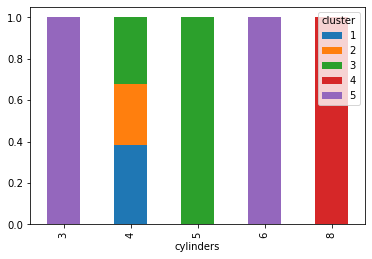

In [139]:
name = 'cylinders'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram5.png')
plt.show()

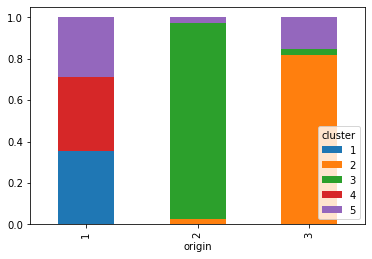

In [140]:
name = 'origin'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram5.png')
plt.show()

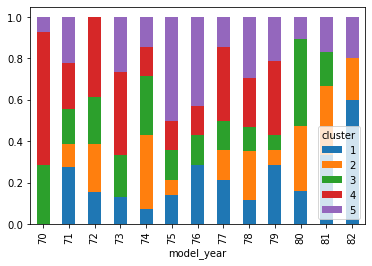

In [141]:
name = 'model_year'
crosstable = pd.crosstab(df_train_cy_ye[name], df_train_cy_ye['cluster'], normalize='index')
crosstable.plot.bar(stacked=True)
plt.savefig(f'./../img/{name}_dendrogram5.png')
plt.show()

線形回帰ってone-hotした方が良くない？